<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Dataframe%20Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by: Angelo Luis C. Cu

In [2]:
import numpy as np
import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.0


In [3]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [4]:
fb.assign(
  abs_z_score_volume=lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs() # gets the z-score of volume
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [5]:
fb.assign(
  volume_pct_change=fb.volume.pct_change(), # gets the percent change in volume compared to day before
  pct_change_rank=lambda x: x.volume_pct_change.abs().rank( # ranks from highest to lowest change
    ascending=False
  )
).nsmallest(5, 'pct_change_rank') # gets the top 5 highest percent change

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [6]:
# fb announces news feed changes
fb['2018-01-11':'2018-01-12']
# notice that stocks fell from 188.40 on jan. 11 to 179.37 on jan. 12

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [7]:
(fb > 215).any() # notice that there weren't any lows above 215

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [8]:
(fb > 215).all() # there were at least a day where fb's OHLC were less than 215

open      False
high      False
low       False
close     False
volume     True
dtype: bool

In [9]:
(fb.volume.value_counts() > 1).sum() # there weren't any days with similar volume

0

In [10]:
# separates the volume into 3 "bins" with equal volume
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high']) # named low, med, high
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [11]:
fb[volume_binned == 'high'].sort_values(
  'volume', ascending=False
)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [12]:
# fb announces slow user growth
fb['2018-07-25':'2018-07-26'] # notice the big drop in stocks from 215.715 to 176.26

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


In [13]:
# cambridge analytica scandal
fb['2018-03-16':'2018-03-20'] # another drop in stocks from 184.49 to 168.15

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [14]:
import matplotlib.pyplot as plt # plotting using matplotlib

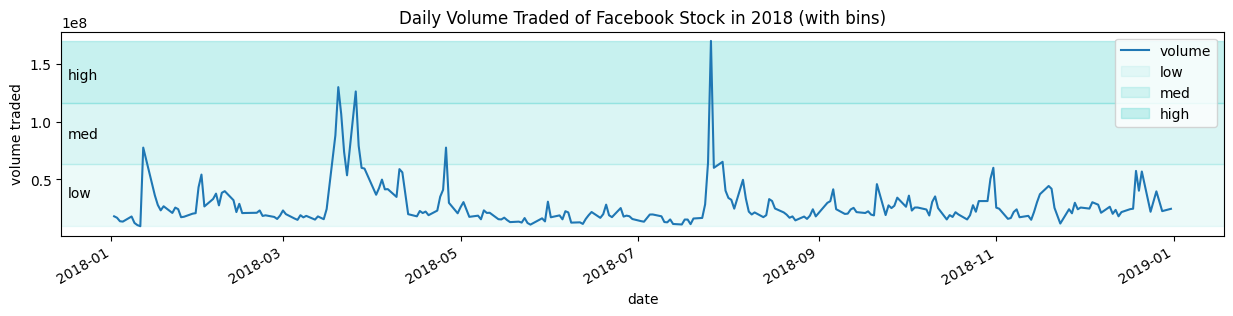

In [15]:
fb.plot(y='volume', figsize=(15, 3), title='Daily Volume Traded of Facebook Stock in 2018 (with bins)')

for bin_name, alpha, bounds in zip(
  ['low', 'med', 'high'], [0.1, 0.2, 0.3], pd.cut(fb.volume, bins=3).unique().categories.values
):
  plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
  plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume traded')
plt.legend()
plt.show()

In [16]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4']) # uses .qcut() method to cut into 4 quartiles
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

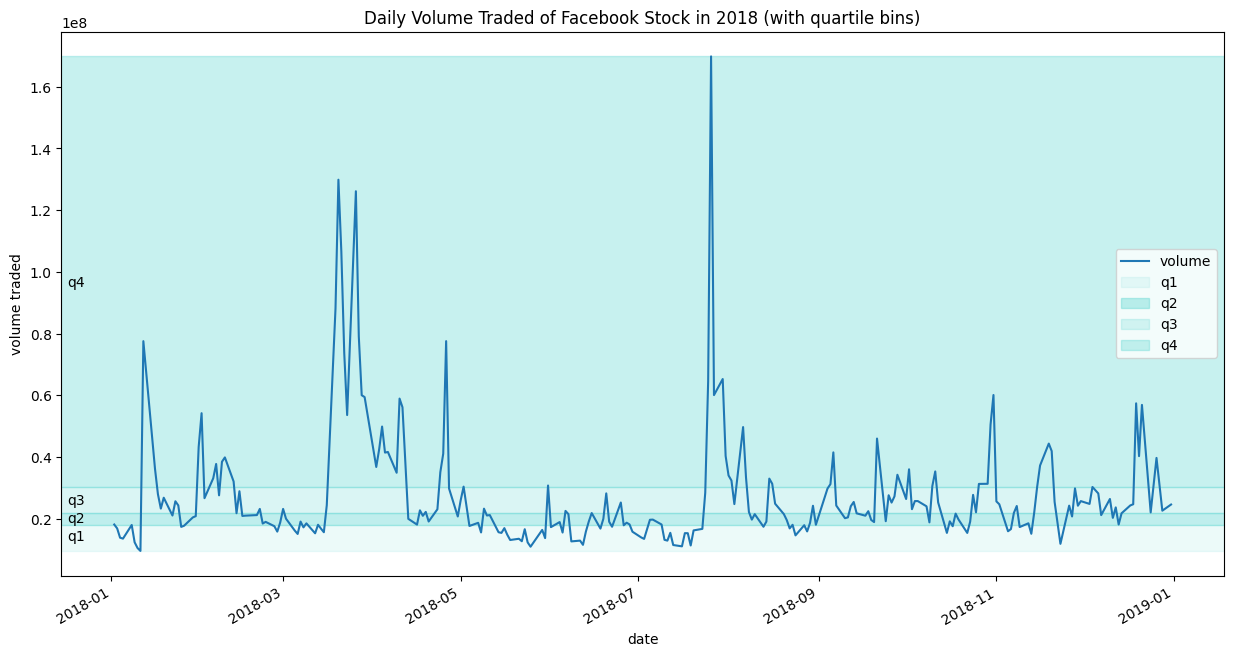

In [17]:
fb.plot(y='volume', figsize=(15, 8), title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)') # plotting with matplotlib
for bin_name, alpha, bounds in zip(
  ['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.qcut(fb.volume, q=4).unique().categories.values
):
  plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
  plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()
# notice the volume isn't equal anymore with bigger spikes

In [18]:
central_park_weather = weather.query(
  'station == "GHCND:USW00094728"' # gets weather with central park station
).pivot(index='date', columns='datatype', values='value')

In [19]:
central_park_weather.SNOW.clip(0, 1).value_counts()
# changes snow column to only have 0 for no snow and 1 for with snow

0.0    354
1.0     11
Name: SNOW, dtype: int64

In [20]:
oct_weather_z_scores = central_park_weather.loc[
  '2018-10', ['TMIN', 'TMAX', 'PRCP'] # applies to TMIN, TMAX, and PRCP columns for october
].apply(lambda x: x.sub(x.mean()).div(x.std())) # gets the z score
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,4.655774e-17,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [21]:
oct_weather_z_scores.query('PRCP > 3') # oct. 27 showed higher precipitation

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [22]:
central_park_weather.loc['2018-10', 'PRCP'].describe() # notice the mean is 2.94

count    31.000000
mean      2.941935
std       7.458542
min       0.000000
25%       0.000000
50%       0.000000
75%       1.150000
max      32.300000
Name: PRCP, dtype: float64

In [23]:
import numpy as np
fb.apply(
  lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x) # vectorizes the data
).astype('int64').equals(
  fb.applymap(lambda x: len(str(np.ceil(x)))) # check if it is equal to the length of ceiling
)

True

<ipython-input-24-e37844af9fe5>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in test.iteritems(): # uses iteritems


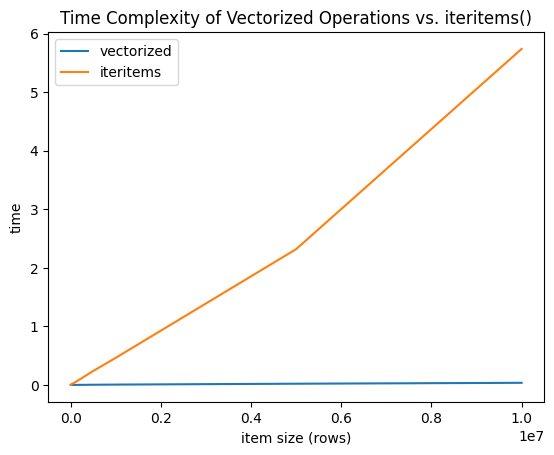

In [24]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)
vectorized_results = {}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
  test = pd.Series(np.random.uniform(size=size))

  start = time.time() # uses vector operations
  x = test + 10
  end = time.time()
  vectorized_results[size] = end - start

  start = time.time()
  x = []
  for i, v in test.iteritems(): # uses iteritems
    x.append(v + 10)
  x = pd.Series(x)
  end = time.time()
  iteritems_results[size] = end - start

pd.DataFrame( # plots with matplotlib
  [pd.Series(vectorized_results, name='vectorized'), pd.Series(iteritems_results, name='iteritems')]
).T.plot(title='Time Complexity of Vectorized Operations vs. iteritems()')
plt.xlabel('item size (rows)')
plt.ylabel('time')
plt.show()

# notice that using iteritems is more time intensive
# hence, we should vectorize data whenever possible

In [25]:
central_park_weather['2018-10'].assign(
  rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum() # performs rolling sum every 3 days
)[['PRCP', 'rolling_PRCP']].head(7).T

<ipython-input-25-04280828d53d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'].assign(


date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [26]:
central_park_weather['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]
# gets the rolling average every 3 days from october 2018

<ipython-input-26-2abb37634d3b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]


datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000
2018-10-06,0.833333,0.333333,0.0,0.0,22.033333,16.300000
2018-10-07,1.066667,0.000000,0.0,0.0,22.600000,17.400000


In [27]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg( # performs multiple rolling calculations
  {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
).join(
  central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
  lsuffix='_rolling' # result is in a column with added _rolling suffix
).sort_index(axis=1) # sorts the result

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


In [29]:
fb.assign(
  close_ewma=lambda x: x.close.ewm(span=5).mean()
  # .ewm() = exponential weighted moving, .mean() = average
).tail(10)[['close', 'close_ewma']]

,close,close_ewma
date,,
2018-12-17,140.19,142.235433
2018-12-18,143.66,142.710289
2018-12-19,133.24,139.553526
2018-12-20,133.40,137.502350
2018-12-21,124.95,133.318234
2018-12-24,124.06,130.232156
2018-12-26,134.18,131.548104
2018-12-27,134.52,132.538736
2018-12-28,133.20,132.759157


In [32]:
# using pipes
def get_info(df):
  return '%d rows and %d columns and max closing z-score was %d' % (*df.shape, df.close.max())
# checks if the two statements are the same
# pipe() here is used to also call get_info
fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
  == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))

<ipython-input-32-62174f0c759c>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
<ipython-input-32-62174f0c759c>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))


True

In [33]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(fb.rolling('20D').mean())
# this is more flexible as we can just change the .rolling() to another function

True

In [34]:
pd.DataFrame.rolling(fb, '20D').mean().equals(fb.rolling('20D').mean())
# this is the same as the code above

True

In [36]:
# for the code to work, window_calc.py should be uploaded to the colab content
from window_calc import window_calc
window_calc??

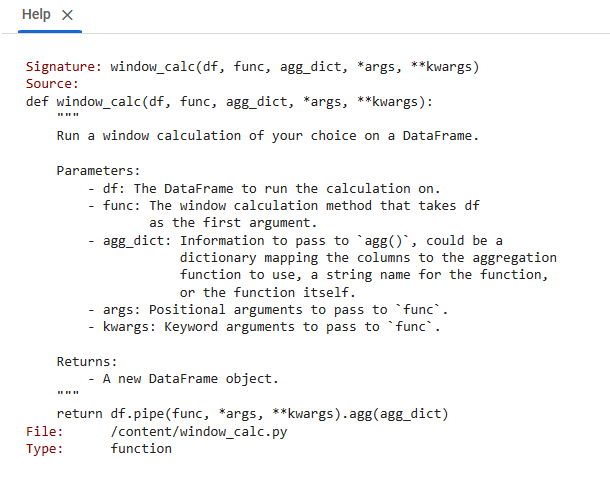

In [37]:
window_calc(fb, pd.DataFrame.expanding, np.median).head() # performs expanding median window calculation to fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


In [38]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head() # performs exponential weighted moving mean to fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


In [39]:
window_calc(
central_park_weather['2018-10'], # performs to central_park_weather dataframe
  pd.DataFrame.rolling, # different rolling functions per column
  {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}, # using .agg() method
  '3D' # for 3 days
).head()

<ipython-input-39-5c44dd1dd438>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'], # performs to central_park_weather dataframe


datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0
